In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import timedelta
from re import M
# encode categorial data
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


from scipy.stats import chi2_contingency


In [35]:
user_data = pd.read_csv('https://github.com/grvvrmtech/AdoptedAnalysis/raw/main/takehome_users_2.csv', encoding='latin-1')

In [36]:
log_data = pd.read_csv('https://github.com/grvvrmtech/AdoptedAnalysis/raw/main/takehome_user_engagement_1.csv')


In [3]:
log_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [4]:
log_data.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


In [5]:
log_data.sample(10)

,time_stamp,user_id,visited
173466,2014-04-15 18:42:03,9746,1
98157,2012-07-28 23:28:26,5378,1
32121,2014-05-25 10:37:24,1941,1
121369,2013-07-06 15:47:10,6909,1
120770,2013-04-07 06:32:25,6870,1
159798,2012-08-20 10:23:48,9187,1
92344,2014-03-09 00:38:43,5087,1
111338,2014-04-30 17:31:33,6198,1
53746,2013-07-23 20:17:21,3160,1
168485,2013-11-13 05:23:35,9559,1


In [6]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [7]:
user_data.sample(10)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
7730,7731,2014-04-01 06:34:20,Damgaard Johanne,JohanneBDamgaard@hotmail.com,SIGNUP,1.396334e+09,1,0,118,NaN
9810,9811,2013-10-20 04:18:42,Gregersen Victoria,VictoriaRGregersen@hotmail.com,GUEST_INVITE,NaN,0,0,192,9764.0
11352,11353,2013-10-28 18:34:25,Cardoso Júlia,JuliaCostaCardoso@jourrapide.com,PERSONAL_PROJECTS,NaN,0,0,372,NaN
3153,3154,2014-04-28 17:12:11,Dreher Katrin,KatrinDreher@hotmail.com,ORG_INVITE,1.399137e+09,1,0,177,9589.0
7402,7403,2014-03-31 19:41:57,Duggan Ashton,AshtonDuggan@gmail.com,PERSONAL_PROJECTS,1.399751e+09,0,0,173,NaN
10722,10723,2013-11-01 23:20:01,Damgaard Jasmin,xnvpoyfd@ymohu.com,ORG_INVITE,1.383866e+09,0,0,26,7744.0
4977,4978,2012-09-13 06:51:50,Austerlitz Brigitte,BrigitteAusterlitz@gmail.com,ORG_INVITE,NaN,0,0,169,11447.0
97,98,2014-05-13 15:52:03,Charles Benjamin,BenjaminCharles@jourrapide.com,ORG_INVITE,1.399996e+09,0,0,196,6529.0
11076,11077,2013-12-15 23:23:38,Martins Julia,JuliaDiasMartins@gustr.com,SIGNUP,1.387150e+09,0,0,9,NaN
5748,5749,2013-05-04 16:53:28,Howard Mason,MasonHoward@gustr.com,PERSONAL_PROJECTS,NaN,0,0,49,NaN


In [8]:
# removing missing values
print(f'defore removing {log_data.shape}')
log_data.dropna(inplace=True)
print(f'after removing {log_data.shape}')

defore removing (207917, 3)
after removing (207917, 3)


In [9]:
# checking missing values
print(user_data.isnull().sum())

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64


In [10]:
# converting datetime data
log_data['time_stamp'] = pd.to_datetime(log_data['time_stamp'])
user_data['creation_time'] = pd.to_datetime(user_data['creation_time'])
user_data['last_session_creation_time'] = pd.to_datetime(user_data['last_session_creation_time'], unit='s')

In [11]:
# fill creation time to last session for missing values
user_data.loc[user_data['last_session_creation_time'].isnull(),'last_session_creation_time'] = user_data.loc[user_data['last_session_creation_time'].isnull(),'creation_time']

In [12]:
# checking missing values
print(user_data.isnull().sum())

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time       0
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64


In [13]:
# removing self invited users
user_data.loc[user_data['invited_by_user_id'] == user_data['object_id'], 'invited_by_user_id'] = np.nan

In [14]:
# found adopted users
daily_visited =  log_data.groupby('user_id').resample('D', on='time_stamp').sum()

del daily_visited['user_id']
daily_visited = daily_visited.reset_index()

weekly_visited = daily_visited.groupby('user_id')['visited'].rolling(7).sum()

adopted_user = weekly_visited[weekly_visited >= 3].reset_index()['user_id']

user_data['is_adopted_user'] = 0
user_data.loc[user_data['object_id'].isin(adopted_user),'is_adopted_user'] = 1

print(user_data['is_adopted_user'].value_counts())
print(user_data['is_adopted_user'].value_counts(normalize=True))

is_adopted_user
0    10403
1     1597
Name: count, dtype: int64
is_adopted_user
0    0.866917
1    0.133083
Name: proportion, dtype: float64


In [15]:
# feature enginner  (is_visited, total_visited_count, domain, user_age, parent_visited_count, parent_age, creation_month, recency)

# lets create an is_visited feature
user_data['is_invited'] = 1
user_data.loc[user_data['invited_by_user_id'].isnull(), 'is_invited'] = 0

user_data.loc[user_data['invited_by_user_id'].isnull(),'invited_by_user_id'] = 0

# create total visited count for each using

visited_count = log_data.groupby('user_id')['visited'].count()
def total_visited_count(user_id):
  if user_id in visited_count.index:
    return visited_count.at[user_id]
  return 0

user_data['total_visited_count'] = user_data['object_id'].apply(total_visited_count)

# create domain from which user login
user_data['domain'] = user_data['email'].apply(lambda x: x.split('@')[1])

# age of user
user_data['user_age'] = (user_data['last_session_creation_time'] - user_data['creation_time']).dt.days

# parent visited count
user_data['parent_visited_count'] = user_data['invited_by_user_id'].apply(lambda x : user_data[user_data['object_id'] == x]['total_visited_count'].values[0] if x != 0 else -1)

# parent age
user_data['parent_age'] = user_data['invited_by_user_id'].apply(lambda x : user_data[user_data['object_id']==x]['user_age'].values[0] if x != 0 else -1)

# create month
user_data['creation_month'] = user_data['creation_time'].dt.month

# recency how recent using login
latest_date = log_data['time_stamp'].max()
user_data['recency'] = (latest_date - user_data['last_session_creation_time']).dt.days


# catogerical data
le = LabelEncoder()
user_data['creation_source_cat'] = le.fit_transform(user_data['creation_source'])
user_data['domain_cat'] = le.fit_transform(user_data['domain'])



Correlation between user age and adoption: 0.7987672852847242




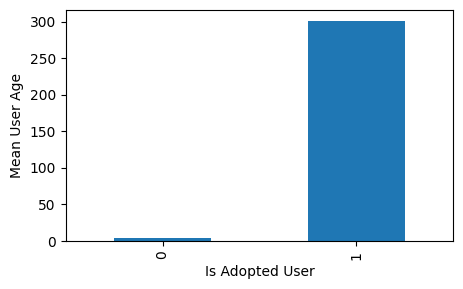

In [16]:
# start EDA

# Group the data by user age and calculate the percentage of adopted users in each age group.
grouped_data = user_data.groupby('is_adopted_user')['user_age'].mean()

# Plot the results as a bar chart.
axis = grouped_data.plot(kind='bar', figsize=(5, 3))
axis.set_ylabel('Mean User Age')
axis.set_xlabel('Is Adopted User')

# Calculate the correlation coefficient between user age and adoption.
correlation = user_data['user_age'].corr(user_data['is_adopted_user'])
print(f'Correlation between user age and adoption: {correlation}\n\n')

# Analyze the results.
# - If the correlation is positive, it means that older users are more likely to be adopted users.
# - If the correlation is negative, it means that younger users are more likely to be adopted users.
# - If the correlation is close to zero, it means that there is no significant relationship between user age and adoption.


In [17]:
user_data.groupby('is_adopted_user')['user_age'].describe()

,count,mean,std,min,25%,50%,75%,max
is_adopted_user,,,,,,,,
0,10403.0,4.001057,13.856771,0.0,0.0,0.0,1.0,251.0
1,1597.0,301.123356,205.413915,6.0,130.0,251.0,471.0,729.0


In [18]:
true_data = user_data[user_data['is_adopted_user'] == 1]
false_data = user_data[user_data['is_adopted_user'] == 0]

Chi-Square Statistic: 91.82441465902006
p-value: 5.393461373719509e-19
Degrees of Freedom: 4
There is a significant association between 'creation_source' and 'is_adopted_user'.




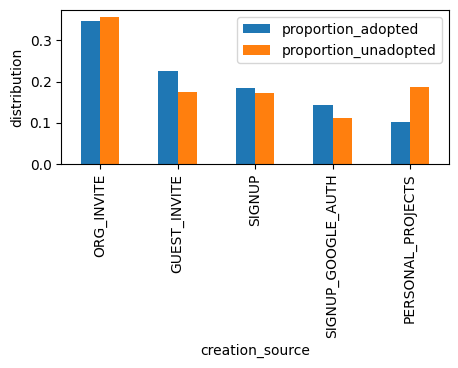

In [19]:
feature = 'creation_source'
axis = pd.merge(true_data[feature].value_counts(normalize=True),
         false_data[feature].value_counts(normalize=True),
         how='inner',on=feature,
         suffixes=('_adopted', '_unadopted')).plot(
             kind='bar',
             figsize=(5, 2),
             ylabel='distribution',
             xlabel=feature,
             fontsize=10)

# Create a contingency table
contingency_table = pd.crosstab(user_data[feature+'_cat'], user_data['is_adopted_user'])

# Perform the Chi-Square test
chi2, p, dof, ex = chi2_contingency(contingency_table)

# Display the results
print("Chi-Square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)

# Interpretation
if p < 0.05:
    print(f"There is a significant association between '{feature}' and 'is_adopted_user'.\n\n")
else:
    print(f"There is no significant association between '{feature}' and 'is_adopted_user'.\n\n")


In [20]:
# finding creation source is making the impact if user is from GUEST_INVITE, SIGNUP, SIGNUP_GOOGLE will more likely be adopted user

Chi-Square Statistic: 0.8735402286574521
p-value: 0.3499770846114467
Degrees of Freedom: 1
There is no significant association between 'opted_in_to_mailing_list' and 'is_adopted_user'.




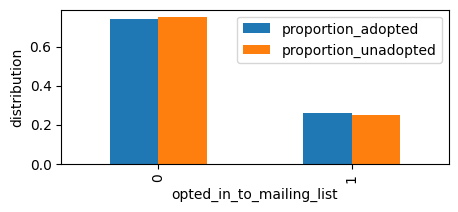

In [21]:
feature = 'opted_in_to_mailing_list'
axis = pd.merge(true_data[feature].value_counts(normalize=True),
         false_data[feature].value_counts(normalize=True),
         how='inner',on=feature,
         suffixes=('_adopted', '_unadopted')).plot(
             kind='bar',
             figsize=(5, 2),
             ylabel='distribution',
             xlabel=feature,
             fontsize=10)

# Create a contingency table
contingency_table = pd.crosstab(user_data[feature], user_data['is_adopted_user'])

# Perform the Chi-Square test
chi2, p, dof, ex = chi2_contingency(contingency_table)

# Display the results
print("Chi-Square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)

# Interpretation
if p < 0.05:
    print(f"There is a significant association between '{feature}' and 'is_adopted_user'.\n\n")
else:
    print(f"There is no significant association between '{feature}' and 'is_adopted_user'.\n\n")


In [22]:
# there is no major contribution of opted_in_to_mailing_list

Chi-Square Statistic: 0.27977933503082475
p-value: 0.596845884826041
Degrees of Freedom: 1
There is no significant association between 'enabled_for_marketing_drip' and 'is_adopted_user'.




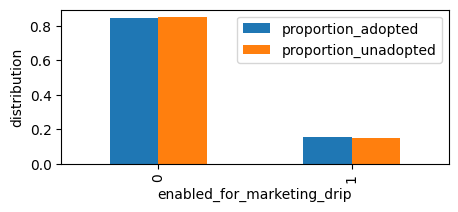

In [23]:
feature = 'enabled_for_marketing_drip'
axis = pd.merge(true_data[feature].value_counts(normalize=True),
         false_data[feature].value_counts(normalize=True),
         how='inner',on=feature,
         suffixes=('_adopted', '_unadopted')).plot(
             kind='bar',
             figsize=(5, 2),
             ylabel='distribution',
             xlabel=feature,
             fontsize=10)


# Create a contingency table
contingency_table = pd.crosstab(user_data[feature], user_data['is_adopted_user'])

# Perform the Chi-Square test
chi2, p, dof, ex = chi2_contingency(contingency_table)

# Display the results
print("Chi-Square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)

# Interpretation
if p < 0.05:
    print(f"There is a significant association between '{feature}' and 'is_adopted_user'.\n\n")
else:
    print(f"There is no significant association between '{feature}' and 'is_adopted_user'.\n\n")


Chi-Square Statistic: 1211.215665976044
p-value: 0.2778622311702642
Degrees of Freedom: 1183
There is no significant association between 'domain' and 'is_adopted_user'.




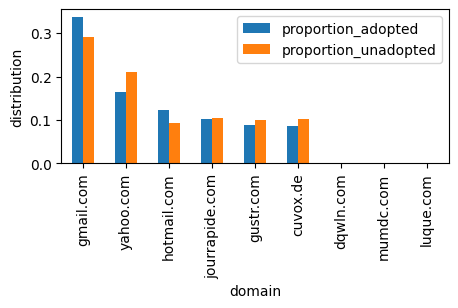

In [24]:
feature = 'domain'
axis = pd.merge(true_data[feature].value_counts(normalize=True),
         false_data[feature].value_counts(normalize=True),
         how='inner',on=feature,
         suffixes=('_adopted', '_unadopted')).plot(
             kind='bar',
             figsize=(5, 2),
             ylabel='distribution',
             xlabel=feature,
             fontsize=10)

from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(user_data[feature+'_cat'], user_data['is_adopted_user'])

# Perform the Chi-Square test
chi2, p, dof, ex = chi2_contingency(contingency_table)

# Display the results
print("Chi-Square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)

# Interpretation
if p < 0.05:
    print(f"There is a significant association between '{feature}' and 'is_adopted_user'.\n\n")
else:
    print(f"There is no significant association between '{feature}' and 'is_adopted_user'.\n\n")

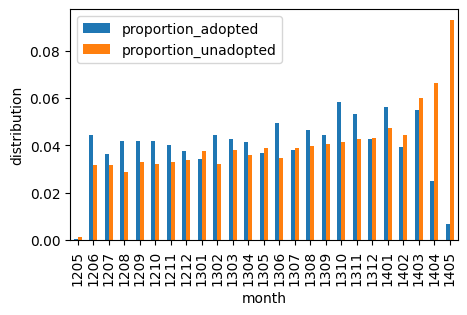

In [25]:
axis = pd.merge(true_data.creation_time.apply(lambda x : x.date().strftime('%y%m')).value_counts(normalize=True),
         false_data.creation_time.apply(lambda x : x.date().strftime('%y%m')).value_counts(normalize=True),
         how='outer',
         on='creation_time',
         suffixes=('_adopted', '_unadopted')).sort_index().plot(
             kind='bar',
             figsize=(5, 3),
             ylabel='distribution',
             xlabel='month',
             fontsize=10)

In [26]:
# this shows that user age is more relevant to adoption user rate

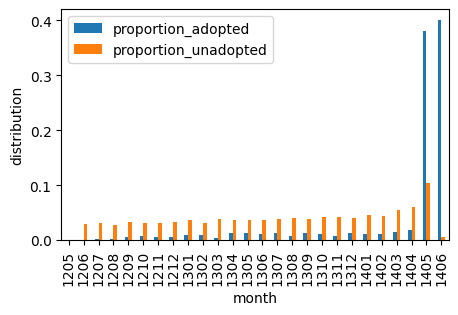

In [27]:
axis = pd.merge(true_data.last_session_creation_time.apply(lambda x : x.date().strftime('%y%m')).value_counts(normalize=True),
         false_data.last_session_creation_time.apply(lambda x : x.date().strftime('%y%m')).value_counts(normalize=True),
         how='outer',
         on='last_session_creation_time',
         suffixes=('_adopted', '_unadopted')).sort_index().plot(
             kind='bar',
             figsize=(5, 3),
             ylabel='distribution',
             xlabel='month',
             fontsize=10)

In [28]:
# this show that recency is also revelant for adopted user

0.9833333333333333
0.99


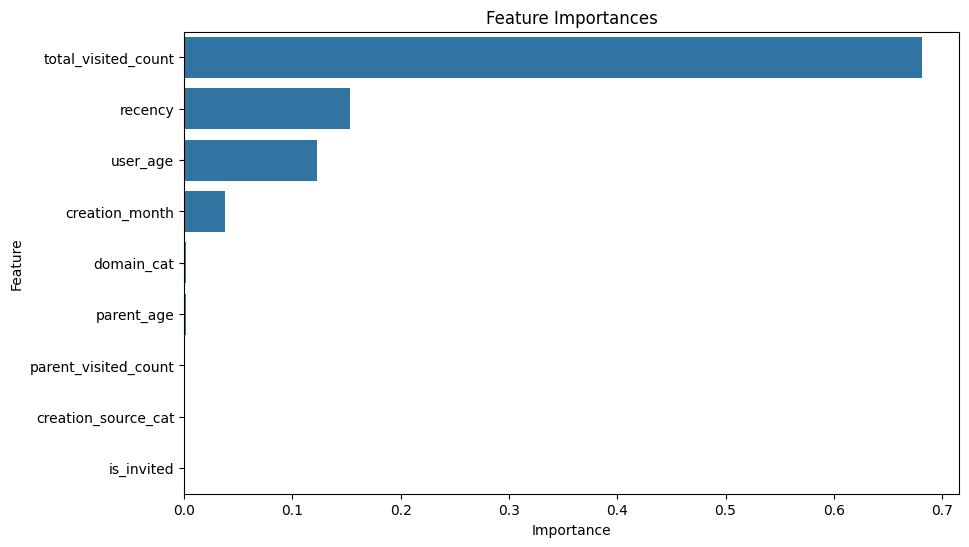

In [29]:
## (creation_source, is_invited, total_visited_count, domain, user_age, parent_visited_count, parent_age, creation_month, recency)

X = user_data[['creation_source_cat', 'is_invited', 'total_visited_count', 'domain_cat', 'user_age', 'parent_visited_count', 'parent_age', 'creation_month', 'recency']]
Y = user_data['is_adopted_user']

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.1, random_state=42)
accuracy_best = 0
best_model = None

for data in sss.split(X, Y):
  train_index, test_index = data
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

  # print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

  model = RandomForestClassifier(
      n_estimators=10,
      max_depth=5,
      random_state=42
  )
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  if accuracy_best < accuracy_score(y_test, y_pred):
    accuracy_best = accuracy_score(y_test, y_pred)
    best_model = model
    print(accuracy_best)

# Get feature importances
importances = best_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.show()
